In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Lost IMDB Analysis

This data is taken from [kaggle](https://www.kaggle.com/datasets/bcruise/lost-episodes) an includes two different files, lost_episodes (which includes information about each episode in the series such as season, episode number, director, number of viewers from the US) and lost_imdb (which includes information about the IMDB rating and the number of votes that episode received. For this analysis I will be looking to see if there are any trends in the data:

**Questions**
1. How did people viewed the show over time? (by looking at the IMDB rating as the show progressed)
2. Did the number of viewers and number of votes on IMDB for an episode stayed the same, increased or decreased the longer the show went on?
    - I initially think that the number of viewers and the number of votes will start high and then see a decrease through the middle seasons, and then increase again as the show gets closer to its last episode
3. What season is believed to be the best season?
4. What director had the highest rated episodes on average?
5. Is there a featured character that leads to a better rating on average?

*In the analysis section of this notebook, there will be a section with a number which corresponds to the questions/ideas shown in this cell*

## Data Preparation

In [4]:
lost_episodes = pd.read_csv("lost_episodes.csv")
lost_imdb = pd.read_csv("lost_imdb.csv")

In [6]:
# view both data sets
display(lost_episodes)
display(lost_imdb)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
0,1,1,1,Pilot: Part 1,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Jack,2004-09-22,18650000.0
1,1,2,2,Pilot: Part 2,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Charlie & Kate,2004-09-29,17000000.0
2,1,3,3,Tabula Rasa,Jack Bender,Damon Lindelof,Kate,2004-10-06,16540000.0
3,1,4,4,Walkabout,Jack Bender,David Fury,Locke,2004-10-13,18160000.0
4,1,5,5,White Rabbit,Kevin Hooks,Christian Taylor,Jack,2004-10-20,16820000.0
...,...,...,...,...,...,...,...,...,...
116,6,14,117,The Candidate,Jack Bender,Elizabeth Sarnoff & Jim Galasso,Jack & Locke,2010-05-04,9590000.0
117,6,15,118,Across the Sea,Tucker Gates,Carlton Cuse & Damon Lindelof,Jacob & Man in Black,2010-05-11,10320000.0
118,6,16,119,What They Died For,Paul Edwards,Edward Kitsis & Adam Horowitz & Elizabeth Sarnoff,various,2010-05-18,10470000.0
119,6,17,120,The End,Jack Bender,Damon Lindelof & Carlton Cuse,various,2010-05-23,13570000.0


,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot: Part 1,22 Sep. 2004,9.2,10778,Forty-eight survivors of an airline flight ori...
1,1,2,Pilot: Part 2,29 Sep. 2004,9.1,8199,"Having retrieved the plane tranceiver, a group..."
2,1,3,Tabula Rasa,6 Oct. 2004,8.4,6480,Jack and Hurley discover an alarming secret ab...
3,1,4,Walkabout,13 Oct. 2004,9.0,7333,"When the survivors run out of food, Locke, Kat..."
4,1,5,White Rabbit,20 Oct. 2004,8.4,5917,Jack begins to experience visions of his dead ...
...,...,...,...,...,...,...,...
114,6,14,The Candidate,4 May 2010,8.9,5281,"With Jack's help, Locke rescues the candidates..."
115,6,15,Across the Sea,11 May 2010,8.2,5402,The story of how Jacob and his brother came to...
116,6,16,What They Died For,18 May 2010,8.6,4811,Jacob appears to the survivors of the submarin...
117,6,17,The End,23 May 2010,8.2,11203,Locke searches for Desmond to achieve his goal...


In [9]:
## basic statistics of both datasets
print("Lost Episodes")
print(lost_episodes.describe())
print("-----------------------------------------------------")
print("Lost IMDB")
print(lost_imdb.describe())

Lost Episodes
           season  episode_num_overall    us_viewers
count  121.000000           121.000000  1.210000e+02
mean     3.231405            61.000000  1.458099e+07
std      1.735705            35.073732  4.051805e+06
min      1.000000             1.000000  8.290000e+06
25%      2.000000            31.000000  1.127000e+07
50%      3.000000            61.000000  1.362000e+07
75%      5.000000            91.000000  1.784000e+07
max      6.000000           121.000000  2.347000e+07
-----------------------------------------------------
Lost IMDB
           season  episode_num  imdb_rating   total_votes
count  119.000000   119.000000   119.000000    119.000000
mean     3.243697    10.781513     8.547899   5270.731092
std      1.746504     6.324769     0.471537   1459.626512
min      1.000000     1.000000     7.200000    843.000000
25%      2.000000     5.500000     8.200000   4645.000000
50%      3.000000    10.000000     8.500000   4968.000000
75%      5.000000    15.500000     8.90

In [10]:
## basic info of both datasets
print("Lost Episodes")
print(lost_episodes.info())
print("-----------------------------------------------------")
print("Lost IMDB")
print(lost_imdb.info())

Lost Episodes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 121 non-null    int64  
 1   episode_num_in_season  121 non-null    object 
 2   episode_num_overall    121 non-null    int64  
 3   title                  121 non-null    object 
 4   directed_by            121 non-null    object 
 5   written_by             121 non-null    object 
 6   featured_character     121 non-null    object 
 7   original_air_date      121 non-null    object 
 8   us_viewers             121 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 8.6+ KB
None
-----------------------------------------------------
Lost IMDB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             ---

The datasets do not have the same number of rows, which does not make sense as they are both referring to the same TV show, it is possible that there are duplicated rows in the dataset that has more observations (lost_episodes). The episode_num_in_season column in lost_episodes is also not a numeric type, so there might be some inconsistencies there that need to be addressed before moving onto an analysis of the data.

### Check for duplicated rows

In [17]:
# check for duplicated rows
lost_episodes[lost_episodes[["title", "original_air_date"]].duplicated()]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
48,2,24,49,"Live Together, Die Alone",Jack Bender,Carlton Cuse & Damon Lindelof,Desmond,2006-05-24,17840000.0
71,3,23,72,Through the Looking Glass,Jack Bender,Carlton Cuse & Damon Lindelof,Jack,2007-05-23,13860000.0


In [18]:
lost_episodes[lost_episodes["title"] == "Live Together, Die Alone"]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
47,2,23,48,"Live Together, Die Alone",Jack Bender,Carlton Cuse & Damon Lindelof,Desmond,2006-05-24,17840000.0
48,2,24,49,"Live Together, Die Alone",Jack Bender,Carlton Cuse & Damon Lindelof,Desmond,2006-05-24,17840000.0


In [19]:
lost_episodes[lost_episodes["title"] == "Through the Looking Glass"]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
70,3,22,71,Through the Looking Glass,Jack Bender,Carlton Cuse & Damon Lindelof,Jack,2007-05-23,13860000.0
71,3,23,72,Through the Looking Glass,Jack Bender,Carlton Cuse & Damon Lindelof,Jack,2007-05-23,13860000.0


The information for these two episodes is the same, except for the episode number columns, in this instance I will drop the last observation in these duplicated rows so that I can join the two datasets together using the correct season and episode values.

In [21]:
# remove rows with index values 48 and 71 from the lost_episodes dataset
lost_episodes.drop([48, 71], axis=0, inplace=True)

### Check for inconsistencies in episode_num_in_season column

In [33]:
### Check Episode Number Column Type
lost_episodes[lost_episodes["season"] == 5]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
86,5,1,87,Because You Left,Stephen Williams,Damon Lindelof & Carlton Cuse,none,2009-01-21,11660000.0
87,5,2,88,The Lie,Jack Bender,Edward Kitsis & Adam Horowitz,Hurley,2009-01-21,11080000.0
88,5,3,89,Jughead,Rod Holcomb,Elizabeth Sarnoff & Paul Zbyszewski,Desmond,2009-01-28,11070000.0
89,5,4,90,The Little Prince,Stephen Williams,Brian K. Vaughan & Melinda Hsu Taylor,Kate,2009-02-04,10980000.0
90,5,5,91,This Place Is Death,Paul Edwards,Edward Kitsis & Adam Horowitz,Sun & Jin,2009-02-11,9770000.0
91,5,6[98],92,316,Stephen Williams,Damon Lindelof & Carlton Cuse,Jack,2009-02-18,11270000.0
92,5,7[98],93,The Life and Death of Jeremy Bentham,Jack Bender,Carlton Cuse & Damon Lindelof,Locke,2009-02-25,9820000.0
93,5,8,94,LaFleur,Mark Goldman,Elizabeth Sarnoff & Kyle Pennington,Sawyer,2009-03-04,10610000.0
94,5,9,95,Namaste,Jack Bender,Paul Zbyszewski & Brian K. Vaughan,none,2009-03-18,9080000.0
95,5,10,96,He's Our You,Greg Yaitanes,Edward Kitsis & Adam Horowitz,Sayid,2009-03-25,8820000.0


It looks like some cells in the episode_num_in_season column contain unneeded brackets that have another number inside of them. Once this is removed then the column can be converted to an integer type.

In [42]:
# replace bracket and contents inside the bracket with nothing
lost_episodes["episode_num_in_season"] = lost_episodes["episode_num_in_season"].str.replace(r"\[\d+\]", "", regex=True)
lost_episodes[lost_episodes["season"] == 5]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers
86,5,1,87,Because You Left,Stephen Williams,Damon Lindelof & Carlton Cuse,none,2009-01-21,11660000.0
87,5,2,88,The Lie,Jack Bender,Edward Kitsis & Adam Horowitz,Hurley,2009-01-21,11080000.0
88,5,3,89,Jughead,Rod Holcomb,Elizabeth Sarnoff & Paul Zbyszewski,Desmond,2009-01-28,11070000.0
89,5,4,90,The Little Prince,Stephen Williams,Brian K. Vaughan & Melinda Hsu Taylor,Kate,2009-02-04,10980000.0
90,5,5,91,This Place Is Death,Paul Edwards,Edward Kitsis & Adam Horowitz,Sun & Jin,2009-02-11,9770000.0
91,5,6,92,316,Stephen Williams,Damon Lindelof & Carlton Cuse,Jack,2009-02-18,11270000.0
92,5,7,93,The Life and Death of Jeremy Bentham,Jack Bender,Carlton Cuse & Damon Lindelof,Locke,2009-02-25,9820000.0
93,5,8,94,LaFleur,Mark Goldman,Elizabeth Sarnoff & Kyle Pennington,Sawyer,2009-03-04,10610000.0
94,5,9,95,Namaste,Jack Bender,Paul Zbyszewski & Brian K. Vaughan,none,2009-03-18,9080000.0
95,5,10,96,He's Our You,Greg Yaitanes,Edward Kitsis & Adam Horowitz,Sayid,2009-03-25,8820000.0


In [43]:
# convert the column to int
lost_episodes["episode_num_in_season"] = lost_episodes["episode_num_in_season"].astype(int)

## Merging Both Datasets

In [47]:
# combine both datasets and selected columns that are wanted
joined_df = lost_episodes.merge(lost_imdb, left_on=["season", "episode_num_in_season"], right_on=["season", "episode_num"])\
    [["season", "episode_num_in_season", "episode_num_overall", "title_x", "directed_by", "written_by", "featured_character", "original_air_date_x", "us_viewers", "imdb_rating", "total_votes"]]\
    .rename(columns={"title_x":"title", "original_air_date_x":"original_air_date"})
display(joined_df)

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers,imdb_rating,total_votes
0,1,1,1,Pilot: Part 1,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Jack,2004-09-22,18650000.0,9.2,10778
1,1,2,2,Pilot: Part 2,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Charlie & Kate,2004-09-29,17000000.0,9.1,8199
2,1,3,3,Tabula Rasa,Jack Bender,Damon Lindelof,Kate,2004-10-06,16540000.0,8.4,6480
3,1,4,4,Walkabout,Jack Bender,David Fury,Locke,2004-10-13,18160000.0,9.0,7333
4,1,5,5,White Rabbit,Kevin Hooks,Christian Taylor,Jack,2004-10-20,16820000.0,8.4,5917
...,...,...,...,...,...,...,...,...,...,...,...
114,6,14,117,The Candidate,Jack Bender,Elizabeth Sarnoff & Jim Galasso,Jack & Locke,2010-05-04,9590000.0,8.9,5281
115,6,15,118,Across the Sea,Tucker Gates,Carlton Cuse & Damon Lindelof,Jacob & Man in Black,2010-05-11,10320000.0,8.2,5402
116,6,16,119,What They Died For,Paul Edwards,Edward Kitsis & Adam Horowitz & Elizabeth Sarnoff,various,2010-05-18,10470000.0,8.6,4811
117,6,17,120,The End,Jack Bender,Damon Lindelof & Carlton Cuse,various,2010-05-23,13570000.0,8.2,11203


In [48]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 119 non-null    int64  
 1   episode_num_in_season  119 non-null    int32  
 2   episode_num_overall    119 non-null    int64  
 3   title                  119 non-null    object 
 4   directed_by            119 non-null    object 
 5   written_by             119 non-null    object 
 6   featured_character     119 non-null    object 
 7   original_air_date      119 non-null    object 
 8   us_viewers             119 non-null    float64
 9   imdb_rating            119 non-null    float64
 10  total_votes            119 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 10.7+ KB


In [52]:
# convert original_air_date to date type
joined_df["original_air_date"] = pd.to_datetime(joined_df["original_air_date"]).dt.date

## Analysis

### Question 1

Question:

How did people viewed the show over time? 

Text(0.5, 0, 'Season')

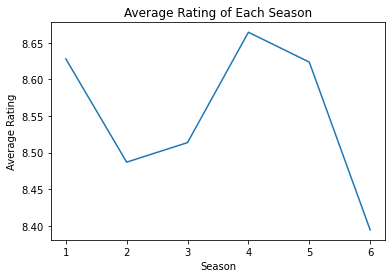

In [59]:
season_avg_ratings = joined_df[["season", "imdb_rating"]].groupby("season", as_index=False).mean()

sns.lineplot(data=season_avg_ratings, x="season", y="imdb_rating")
plt.title("Average Rating of Each Season")
plt.ylabel("Average Rating")
plt.xlabel("Season")

From looking at average ratings per season, it is hard to draw any concrete conclusions about how people viewed the show overtime throughout its entirety. However, from the shows 5th season to its 6th season (the last season) there seems to be a significant drop in the average rating. Having watched all seasons of Lost, I know that some fans were not happy with how the show ended, so perhaps those fans gave episodes in final season a lower rating, bringing down the average ratings for that season.

Text(0.5, 0, 'Episode Number')

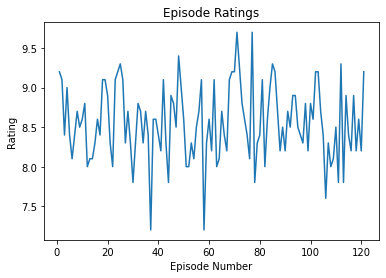

In [61]:
sns.lineplot(data=joined_df, x="episode_num_overall", y="imdb_rating")

plt.title("Episode Ratings")
plt.ylabel("Rating")
plt.xlabel("Episode Number")

Looking at each episode rating over time, there does not to seem to be any particular trend. Perhaps episodes in the range of 100-110 have slightly lower ratings than the rest of the episodes, but overall no solid conclusions can be drawn about show rating increasing or decreasing over time.

Based on my analysis looking at average season rating and episode rating over time, I am confident in the conclusion that peoples opinions on Lost as a whole stayed relatively constant throughout the shows 6 seasons.

### Question 2

Question:

Did the number of viewers and number of votes on IMDB for an episode stayed the same, increased or decreased the longer the show went on?

Text(0.5, 0, 'Episode')

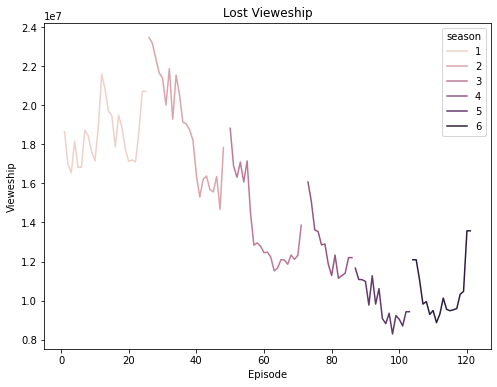

In [79]:
plt.figure(figsize=(8,6))
sns.lineplot(data=joined_df, x="episode_num_overall", y="us_viewers", hue="season")    

plt.title("Lost Vieweship")
plt.ylabel("Vieweship")
plt.xlabel("Episode")

Overall the number of viewers decreases over time. For each season except the first, it looks like viewer numbers started high, decreased throughout the middle of the season, and they had a uptick in viewers for the last episode.

Text(0.5, 0, 'Episode')

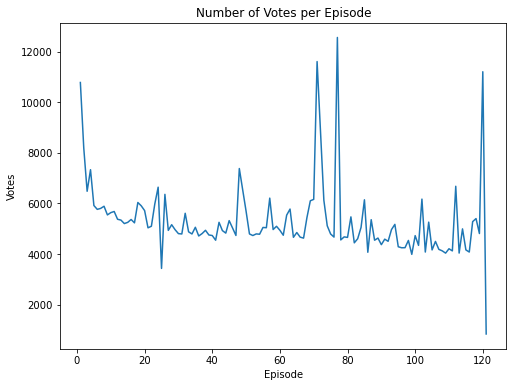

In [80]:
plt.figure(figsize=(8,6))
sns.lineplot(data=joined_df, x="episode_num_overall", y="total_votes")

plt.title("Number of Votes per Episode")
plt.ylabel("Votes")
plt.xlabel("Episode")

It looks like the number of votes each episode gets on IMDB stays relatively consistent through the shows history. There might be a slight decrease over time, but there are also some large peaks. Perhaps there is not as big of a change in the number of votes compared to the decrease seen in number of viewers because people who vote on an episodes rating might be more likely to enjoy the show and continue watching and voting for each episode.

Overall, viewership decreased throughout the shows time on TV, but the number of votes stayed relatively the same over time.

### Question 3

Question:
    
What season is believed to be the best season?

Based on my analysis from the first question I answered, it would seem as if season 4 is the best season, as it has the highest average rating. For this question I am going to attempt to confirm if season 4 is viewed as the best season or if there is another season that deserves to be labeled the best.

In [86]:
season_median_ratings = joined_df[["season", "imdb_rating"]].groupby(["season"], as_index=False).median()

display(season_avg_ratings.rename(columns={"imdb_rating":"avg_rating"}))
display(season_median_ratings.rename(columns={"imdb_rating":"median_rating"}))

,season,avg_rating
0,1,8.628000
1,2,8.486957
2,3,8.513636
3,4,8.664286
4,5,8.623529
5,6,8.394444


,season,median_rating
0,1,8.60
1,2,8.50
2,3,8.45
3,4,8.60
4,5,8.60
5,6,8.35


Although season 4 has the highest average rating, seasons 1, 4 and 6 all have the same median rating. I am going to use a histogram to see if there is any skews in the data for episode ratings in those 3 seasons.

In [90]:
season_146_df = joined_df[joined_df["season"].isin([1, 4, 6])]
display(season_146_df.iloc[:10])

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers,imdb_rating,total_votes
0,1,1,1,Pilot: Part 1,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Jack,2004-09-22,18650000.0,9.2,10778
1,1,2,2,Pilot: Part 2,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Charlie & Kate,2004-09-29,17000000.0,9.1,8199
2,1,3,3,Tabula Rasa,Jack Bender,Damon Lindelof,Kate,2004-10-06,16540000.0,8.4,6480
3,1,4,4,Walkabout,Jack Bender,David Fury,Locke,2004-10-13,18160000.0,9.0,7333
4,1,5,5,White Rabbit,Kevin Hooks,Christian Taylor,Jack,2004-10-20,16820000.0,8.4,5917
5,1,6,6,House of the Rising Sun,Michael Zinberg,Javier Grillo-Marxuach,Sun,2004-10-27,16830000.0,8.1,5766
6,1,7,7,The Moth,Jack Bender,Jennifer Johnson & Paul Dini,Charlie,2004-11-03,18730000.0,8.4,5804
7,1,8,8,Confidence Man,Tucker Gates,Damon Lindelof,Sawyer,2004-11-10,18440000.0,8.7,5889
8,1,9,9,Solitary,Greg Yaitanes,David Fury,Sayid,2004-11-17,17640000.0,8.5,5547
9,1,10,10,Raised by Another,Marita Grabiak,Lynne E. Litt,Claire,2004-12-01,17150000.0,8.6,5637


In [117]:
# episodes in season 1 with a rating greater than than or equal to 9
season_146_df.loc[(season_146_df["season"] == 1) & (season_146_df["imdb_rating"] >= 9)]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers,imdb_rating,total_votes
0,1,1,1,Pilot: Part 1,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Jack,2004-09-22,18650000.0,9.2,10778
1,1,2,2,Pilot: Part 2,J. J. Abrams,Story by: Jeffrey Lieber and J. J. Abrams & Da...,Charlie & Kate,2004-09-29,17000000.0,9.1,8199
3,1,4,4,Walkabout,Jack Bender,David Fury,Locke,2004-10-13,18160000.0,9.0,7333
17,1,18,18,Numbers,Daniel Attias,David Fury & Brent Fletcher,Hurley,2005-03-02,18850000.0,9.1,6037
18,1,19,19,Deus Ex Machina,Robert Mandel,Carlton Cuse & Damon Lindelof,Locke,2005-03-30,17750000.0,9.1,5906
22,1,23,23,Exodus: Part 1,Jack Bender,Damon Lindelof & Carlton Cuse,various,2005-05-18,18620000.0,9.1,5972
23,1,24,24,Exodus: Part 2 (Part I),Jack Bender,Damon Lindelof & Carlton Cuse,various,2005-05-25,20710000.0,9.2,6642
24,1,25,25,Exodus: Part 2 (Part II),Jack Bender,Damon Lindelof & Carlton Cuse,various,2005-05-25,20710000.0,9.3,3433


In [118]:
# episodes in season 4 with a rating greater than or equal to 9
season_146_df.loc[(season_146_df["season"] == 4) & (season_146_df["imdb_rating"] >= 9)]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,featured_character,original_air_date,us_viewers,imdb_rating,total_votes
74,4,5,77,The Constant,Jack Bender,Carlton Cuse & Damon Lindelof,Desmond,2008-02-28,12850000.0,9.7,12557
78,4,9,81,The Shape of Things to Come,Jack Bender,Brian K. Vaughan & Drew Goddard,Ben,2008-04-24,12330000.0,9.1,5469
81,4,12,84,There's No Place Like Home: Part 1,Stephen Williams,Damon Lindelof & Carlton Cuse,"Jack, Hurley, Sayid,Sun, Kate",2008-05-15,11400000.0,9.0,5054
82,4,13,85,There's No Place Like Home: Part 2,Jack Bender,Carlton Cuse & Damon Lindelof,"Jack, Hurley, Sayid,Sun, Kate",2008-05-29,12200000.0,9.3,6144
83,4,14,86,There's No Place Like Home: Part 3,Jack Bender,Carlton Cuse & Damon Lindelof,"Jack, Hurley, Sayid,Sun, Kate",2008-05-29,12200000.0,9.2,4071


Text(0.5, 0, 'Rating')

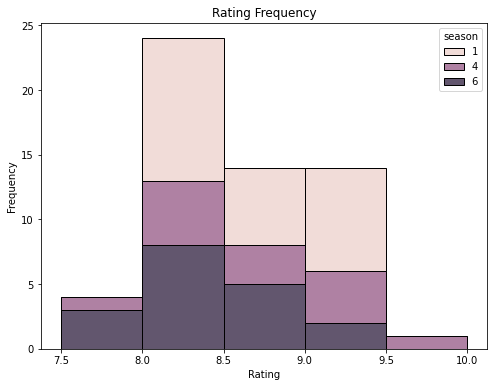

In [109]:
plt.figure(figsize=(8,6))
sns.histplot(data=season_146_df, x="imdb_rating", hue="season", multiple="stack", bins=[7.5, 8, 8.5, 9, 9.5, 10])

plt.title("Rating Frequency")
plt.ylabel("Frequency")
plt.xlabel("Rating")

From this histogram, season 4 has the highest rated episode of the 3 seasons being compared. However, when looking at overall bins, season 1 has the most episodes above a 9.0 rating. So although season 4 has the highest rated episode, it does not have the most episodes with a rating above 9 (season 1 has 8 episodes above a 9 rating and season 4 has 5 episodes above a 9 rating). Depending on how you want to judge the best overall season by looking at ratings, I believe it would be fair to say that season 1 is the best season, but the ratings are similar enough that it could be down to personal preference.

### Question 4

Question:

What director had the highest rated episodes on average?

In [132]:
director_rating_df = joined_df[["directed_by", "imdb_rating"]].groupby("directed_by", as_index=False).agg(num_episodes = ("imdb_rating", "size"), avg_rating = ("imdb_rating", "mean"))

director_rating_df.sort_values("avg_rating", ascending=False).reset_index(drop=True)

,directed_by,num_episodes,avg_rating
0,J. J. Abrams,2,9.150000
1,Robert Mandel,1,9.100000
2,Mark Goldman,1,8.900000
3,Deran Sarafian,1,8.800000
4,Daniel Attias,2,8.750000
5,Jack Bender,40,8.730000
6,Matt Earl Beesley,1,8.700000
7,Marita Grabiak,1,8.600000
8,Roxann Dawson,1,8.600000
9,Bobby Roth,3,8.533333


The director with the best average rating for their episodes is JJ Abrams, with an average rating of 9.15. However, he only directed 2 episodes. Jack Bender has the 6th highest average rating, and directed almost 2 times as many episodes as the director with the second most episodes directed. So although Jack does not have the highest average rating among directors, his sustained success directing episodes of Lost is extremely impressive.

### Question 5

Question:

Is there a featured character that leads to a better rating on average?

In [146]:
character_rating_df = joined_df[["featured_character", "imdb_rating"]].groupby("featured_character", as_index=False)\
    .agg(num_episodes = ("imdb_rating", "size"), avg_rating = ("imdb_rating", "mean"))

top_10_character_features = character_rating_df.sort_values("avg_rating", ascending=False).reset_index(drop=True)[:10]
display(top_10_character_features)

,featured_character,num_episodes,avg_rating
0,Richard,1,9.300000
1,Jacob,2,9.200000
2,"Jack, Hurley, Sayid,Sun, Kate",3,9.166667
3,Charlie & Kate,1,9.100000
4,Desmond,6,9.000000
5,Jack & Locke,1,8.900000
6,Ben,4,8.900000
7,Ana Lucia,2,8.800000
8,"Ana Lucia, Bernard,Libby and Mr. Eko",1,8.800000
9,Faraday,1,8.800000


Text(0.5, 0, 'Avg. Rating')

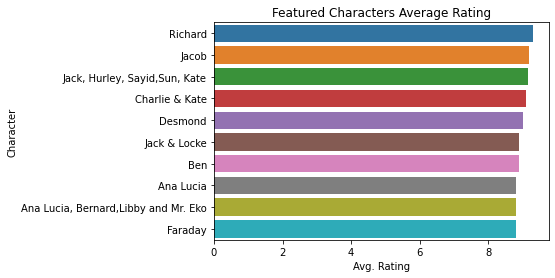

In [145]:
sns.barplot(data=top_10_character_features, x="avg_rating", y="featured_character")

plt.title("Featured Characters Average Rating")
plt.ylabel("Character")
plt.xlabel("Avg. Rating")

The two characters with the highest ratings are Richard and Jacob, however, Richard is only featured in one episode and Jacob is only featured in two episodes. After seeing this, I want to know what the average rating is when some of the main characters are listed as the only featured character. For this I will use the characters James 'Sawyer" Ford, John Locke, Kate Austen, Jack Shephard and Hugo "Hurley" Reyes.

In [152]:
character_rating_df[character_rating_df["featured_character"].isin(["Sawyer", "Locke", "Kate", "Jack", "Hurley"])].sort_values("avg_rating", ascending=False)

,featured_character,num_episodes,avg_rating
19,Locke,10,8.790000
11,Jack,12,8.566667
10,Hurley,7,8.485714
27,Sawyer,6,8.483333
18,Kate,10,8.150000


John Locke has the highest average rating by a decent margin. I am surprised that Kate's average rating when she is featured is so much lower than the other characters, as she is seen as one of the most popular characters on the show. If you want to learn more about some of the popular characters in Lost, here is a [link](https://screenrant.com/lost-fan-favorite-characters-according-reddit/) to an article that gives some insight into the characters (be careful for spoilers if you have not watched the show).

## Conclusion

Overall, I answered some questions about the characters, directors, viewership and ratings related to the TV show Lost. Steps taken include cleaning, manipulating and visualizing data in a way that is interpretable and easy to draw conclusions from.